# Data Mining Assignment W12 Principal Component

# Jefferson Wesley Liunardi / 0706022310046

In [316]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.cluster import AgglomerativeClustering, KMeans
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.metrics import silhouette_score

##  Data Understanding & Preparation

In [317]:
url = "https://raw.githubusercontent.com/NathaliaMinoque/datasets/refs/heads/main/student_dropout_behavior_dataset.csv"
df = pd.read_csv(url)

In [318]:
df.head()

,student_id,name,age,gender,quiz1_marks,quiz2_marks,quiz3_marks,total_assignments,assignments_submitted,midterm_marks,final_marks,previous_gpa,total_lectures,lectures_attended,total_lab_sessions,labs_attended
0,1,Kristina Vaughan,19,Male,8.0,5.7,7.4,5,NaN,30.0,36.5,2.57,12,4,6,1
1,2,Rodney Daniels,21,Male,10.0,7.9,4.1,5,NaN,25.4,33.0,2.40,12,1,6,5
2,3,Jose Nash,19,Female,7.5,1.2,0.3,5,NaN,14.4,24.8,2.99,12,0,6,0
3,4,Nicole Martin,21,Male,5.2,2.5,9.9,5,NaN,17.7,41.0,1.68,12,9,6,0
4,5,Shelby Smith,21,Female,5.9,6.3,2.0,5,NaN,23.8,31.0,2.53,12,7,6,4


In [319]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   student_id             300 non-null    int64  
 1   name                   300 non-null    object 
 2   age                    300 non-null    int64  
 3   gender                 300 non-null    object 
 4   quiz1_marks            300 non-null    float64
 5   quiz2_marks            300 non-null    float64
 6   quiz3_marks            300 non-null    float64
 7   total_assignments      300 non-null    int64  
 8   assignments_submitted  0 non-null      float64
 9   midterm_marks          300 non-null    float64
 10  final_marks            300 non-null    float64
 11  previous_gpa           300 non-null    float64
 12  total_lectures         300 non-null    int64  
 13  lectures_attended      300 non-null    int64  
 14  total_lab_sessions     300 non-null    int64  
 15  labs_a

In [320]:
# Check missing values
print("Missing values per column:")
print(df.isnull().sum())
print("\n")

Missing values per column:
student_id                 0
name                       0
age                        0
gender                     0
quiz1_marks                0
quiz2_marks                0
quiz3_marks                0
total_assignments          0
assignments_submitted    300
midterm_marks              0
final_marks                0
previous_gpa               0
total_lectures             0
lectures_attended          0
total_lab_sessions         0
labs_attended              0
dtype: int64




In [321]:
df = df.drop(columns=['assignments_submitted'])

In [322]:
# Shape of dataset
print("Shape of dataset (rows, columns):")
print(df.shape)
print("\n")

Shape of dataset (rows, columns):
(300, 15)




In [323]:
# Data types
print("Data types for each column:")
print(df.dtypes)
print("\n")

Data types for each column:
student_id              int64
name                   object
age                     int64
gender                 object
quiz1_marks           float64
quiz2_marks           float64
quiz3_marks           float64
total_assignments       int64
midterm_marks         float64
final_marks           float64
previous_gpa          float64
total_lectures          int64
lectures_attended       int64
total_lab_sessions      int64
labs_attended           int64
dtype: object




In [324]:
# Basic descriptive statistics
print("Descriptive Statistics:")
print(df.describe(include='all'))

Descriptive Statistics:
        student_id           name         age  gender  quiz1_marks  \
count   300.000000            300  300.000000     300   300.000000   
unique         NaN            297         NaN       2          NaN   
top            NaN  Michael Davis         NaN  Female          NaN   
freq           NaN              2         NaN     155          NaN   
mean    150.500000            NaN   21.550000     NaN     7.254667   
std      86.746758            NaN    2.241483     NaN     1.611791   
min       1.000000            NaN   18.000000     NaN     2.800000   
25%      75.750000            NaN   20.000000     NaN     6.075000   
50%     150.500000            NaN   22.000000     NaN     7.300000   
75%     225.250000            NaN   23.000000     NaN     8.400000   
max     300.000000            NaN   25.000000     NaN    10.000000   

        quiz2_marks  quiz3_marks  total_assignments  midterm_marks  \
count    300.000000   300.000000              300.0     300.00000

In [325]:
for col in df.columns:
    print(f"\n--- {col} ---")
    print("Unique count:", df[col].nunique())
    print("Unique values:", df[col].unique())


--- student_id ---
Unique count: 300
Unique values: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 23

In [326]:
df_cleaned = df.drop(columns=[
    'student_id',
    'name',
    'total_assignments',
    'total_lectures',
    'total_lab_sessions'
])

In [327]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                300 non-null    int64  
 1   gender             300 non-null    object 
 2   quiz1_marks        300 non-null    float64
 3   quiz2_marks        300 non-null    float64
 4   quiz3_marks        300 non-null    float64
 5   midterm_marks      300 non-null    float64
 6   final_marks        300 non-null    float64
 7   previous_gpa       300 non-null    float64
 8   lectures_attended  300 non-null    int64  
 9   labs_attended      300 non-null    int64  
dtypes: float64(6), int64(3), object(1)
memory usage: 23.6+ KB


In [328]:
df.describe()

,student_id,age,quiz1_marks,quiz2_marks,quiz3_marks,total_assignments,midterm_marks,final_marks,previous_gpa,total_lectures,lectures_attended,total_lab_sessions,labs_attended
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.0,300.000000,300.000000,300.000000,300.0,300.000000,300.0,300.000000
mean,150.500000,21.550000,7.254667,5.866667,5.469000,5.0,19.969000,37.375000,2.806033,12.0,6.013333,6.0,3.110000
std,86.746758,2.241483,1.611791,2.414786,2.711083,0.0,8.272229,11.796774,0.732694,0.0,3.726407,0.0,1.982676
min,1.000000,18.000000,2.800000,0.000000,0.000000,5.0,0.000000,0.000000,0.610000,12.0,0.000000,6.0,0.000000
25%,75.750000,20.000000,6.075000,4.000000,3.600000,5.0,14.225000,29.875000,2.327500,12.0,3.000000,6.0,1.000000
50%,150.500000,22.000000,7.300000,5.800000,5.600000,5.0,21.350000,39.600000,2.800000,12.0,6.000000,6.0,3.000000
75%,225.250000,23.000000,8.400000,7.700000,7.200000,5.0,27.425000,49.550000,3.320000,12.0,9.000000,6.0,5.000000
max,300.000000,25.000000,10.000000,10.000000,10.000000,5.0,30.000000,50.000000,4.000000,12.0,12.000000,6.0,6.000000


In [329]:
# Check final cleaned dataset
print("Shape after cleaning:", df.shape)
print(df.head())

Shape after cleaning: (300, 15)
   student_id              name  age  gender  quiz1_marks  quiz2_marks  \
0           1  Kristina Vaughan   19    Male          8.0          5.7   
1           2    Rodney Daniels   21    Male         10.0          7.9   
2           3         Jose Nash   19  Female          7.5          1.2   
3           4     Nicole Martin   21    Male          5.2          2.5   
4           5      Shelby Smith   21  Female          5.9          6.3   

   quiz3_marks  total_assignments  midterm_marks  final_marks  previous_gpa  \
0          7.4                  5           30.0         36.5          2.57   
1          4.1                  5           25.4         33.0          2.40   
2          0.3                  5           14.4         24.8          2.99   
3          9.9                  5           17.7         41.0          1.68   
4          2.0                  5           23.8         31.0          2.53   

   total_lectures  lectures_attended  total_lab_

 # Exploratory Data Analysis (EDA)

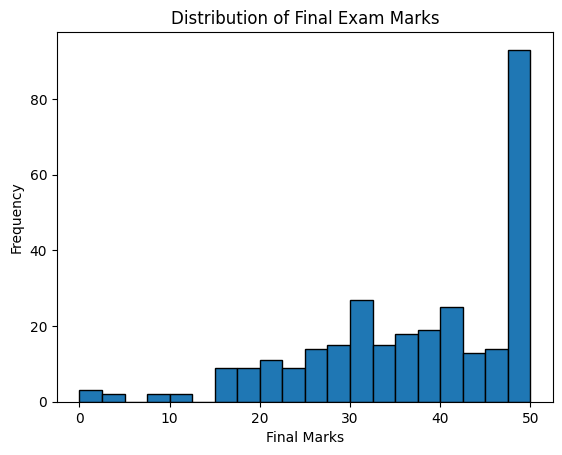

In [330]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram showing final Exam Marks
plt.hist(df['final_marks'], bins=20, edgecolor='black')
plt.title("Distribution of Final Exam Marks")
plt.xlabel("Final Marks")
plt.ylabel("Frequency")
plt.show()

The distribution of final exam marks shows that most students score in the mid-to-high range, indicating that overall academic performance is generally good.
The histogram is slightly right-skewed, which means a larger number of students tend to cluster around higher scores rather than lower ones. Very low scores are rare, suggesting that only a small portion of students are struggling with the final exam.

This pattern implies that students likely understand the course content well, or that assessment difficulty aligns with student capability. For educators, the right-skew may indicate that instructional strategies and learning materials are effective for the majority of students. However, the small group scoring low may need additional academic support or targeted intervention.

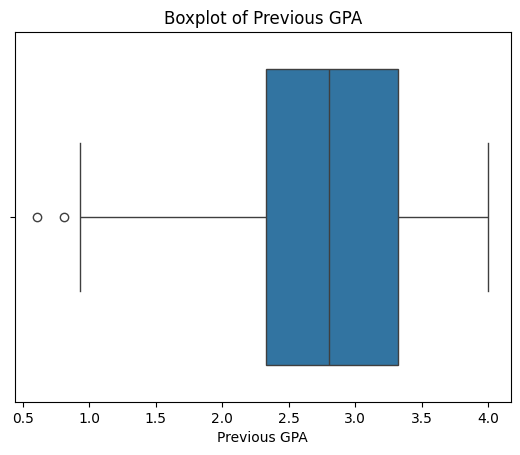

In [331]:
# Boxplot showing Previous GPA
sns.boxplot(x=df['previous_gpa'])
plt.title("Boxplot of Previous GPA")
plt.xlabel("Previous GPA")
plt.show()

The boxplot for previous GPA shows that most students have GPA values in the middle-to-high performance range, with very few or no extreme outliers. This indicates that the academic performance of students from the previous semester is relatively stable and consistent.

A narrow interquartile range (IQR) suggests that the majority of students share similar academic backgrounds. This is important, as GPA strongly influences future assessments. Since no significant outliers are present, it suggests there are no students with extremely poor or extremely exceptional past performance. This uniform academic history may simplify clustering later, as students start from relatively similar baselines.

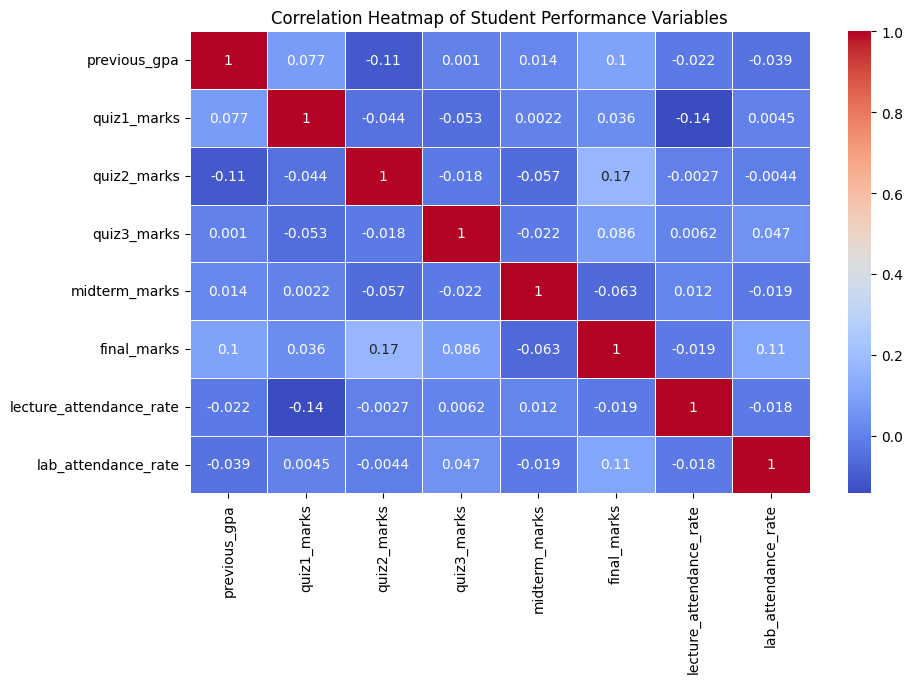

In [332]:
plt.figure(figsize=(10,6))

# Calculate attendance rates
df_cleaned['lecture_attendance_rate'] = df_cleaned['lectures_attended'] / 12
df_cleaned['lab_attendance_rate'] = df_cleaned['labs_attended'] / 6

key_vars = [
    'previous_gpa',
    'quiz1_marks', 'quiz2_marks', 'quiz3_marks',
    'midterm_marks', 'final_marks',
    'lecture_attendance_rate', 'lab_attendance_rate'
]

corr = df_cleaned[key_vars].corr()

sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap of Student Performance Variables")
plt.show()

The correlation heatmap reveals several key patterns:

Strong positive correlations exist among quiz scores, midterm marks, and final exam marks. This means that students who perform well in quizzes tend also to perform well in midterms and finals, reflecting consistent academic habits and learning progression.

Previous GPA also shows strong positive correlations with all assessment components. This suggests that past academic performance is a strong indicator of future success, highlighting the importance of long-term study behavior and foundational understanding.

Both lecture attendance rate and lab attendance rate exhibit moderate positive correlations with performance measures. This implies that attending classes contributes meaningfully to student success. Students with higher attendance tend to achieve higher marks, reinforcing the role of engagement and presence in the learning process.

Overall, the heatmap indicates that student performance is influenced by a combination of consistent study habits, prior academic history, and engagement through attendance.

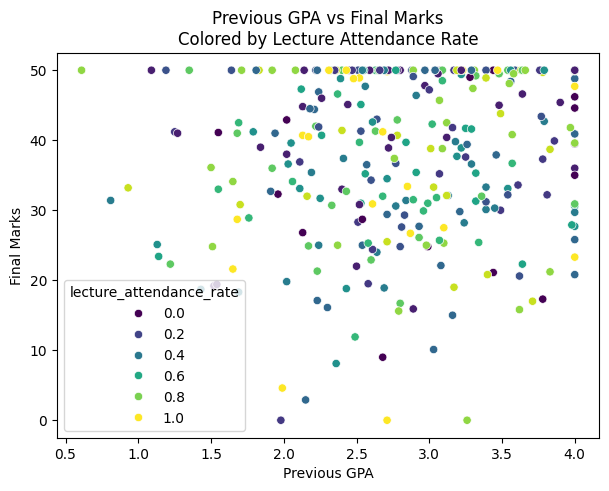

In [334]:
# Scatter Plot (previous_gpa vs final_marks)
# Colored by lecture_attendance_rate
plt.figure(figsize=(7,5))
sns.scatterplot(
    data=df_cleaned,
    x='previous_gpa',
    y='final_marks',
    hue='lecture_attendance_rate',
    palette='viridis'
)
plt.title("Previous GPA vs Final Marks\nColored by Lecture Attendance Rate")
plt.xlabel("Previous GPA")
plt.ylabel("Final Marks")
plt.show()

The scatter plot illustrates a clear positive relationship between previous GPA and final exam marks. Students with higher GPAs tend to achieve higher final scores, suggesting that academic performance is cumulative and that students with strong fundamentals continue to excel.

The color gradient representing lecture attendance rate adds an important dimension. Students with high attendance (lighter colors) cluster in the upper-right region of the plot, indicating strong performance. On the other hand, darker points representing low attendance are mostly found in the lower score range.

This trend highlights that:

Students who attend lectures more frequently tend to perform better regardless of prior GPA.

Low attendance appears to be a risk factor for lower academic achievement.

Attendance may act as a catalyst: even students with average GPAs can boost performance through consistent class participation.

For educators, this suggests that encouraging lecture attendance—through engaging teaching methods, participation activities, or attendance policies—can directly enhance student outcomes.

# Encoding

In [335]:
# Encode categorical variables
from sklearn.preprocessing import LabelEncoder

df_encoded = df_cleaned.copy()

le = LabelEncoder()

df_encoded['gender'] = le.fit_transform(df_encoded['gender'])

df_encoded.head()

,age,gender,quiz1_marks,quiz2_marks,quiz3_marks,midterm_marks,final_marks,previous_gpa,lectures_attended,labs_attended,lecture_attendance_rate,lab_attendance_rate
0,19,1,8.0,5.7,7.4,30.0,36.5,2.57,4,1,0.333333,0.166667
1,21,1,10.0,7.9,4.1,25.4,33.0,2.40,1,5,0.083333,0.833333
2,19,0,7.5,1.2,0.3,14.4,24.8,2.99,0,0,0.000000,0.000000
3,21,1,5.2,2.5,9.9,17.7,41.0,1.68,9,0,0.750000,0.000000
4,21,0,5.9,6.3,2.0,23.8,31.0,2.53,7,4,0.583333,0.666667


# Boxplot for all numerical features

In [336]:
numerical_cols = df_encoded.select_dtypes(include=np.number).columns.tolist()
if 'gender' in numerical_cols:
    numerical_cols.remove('gender')

print(f"Numerical columns (excluding gender): {numerical_cols}")

Numerical columns (excluding gender): ['age', 'quiz1_marks', 'quiz2_marks', 'quiz3_marks', 'midterm_marks', 'final_marks', 'previous_gpa', 'lectures_attended', 'labs_attended', 'lecture_attendance_rate', 'lab_attendance_rate']


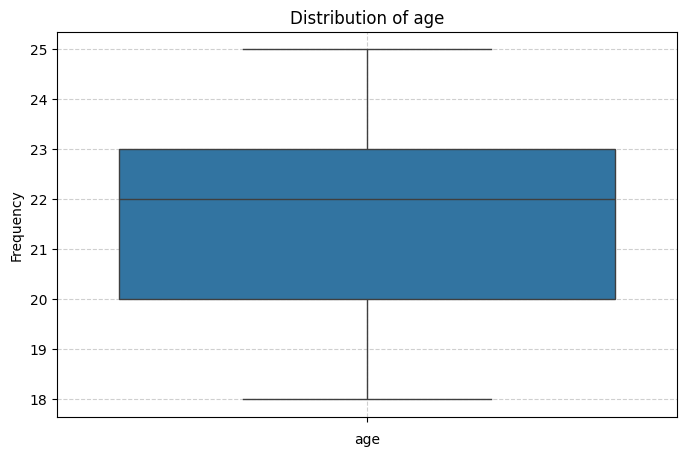

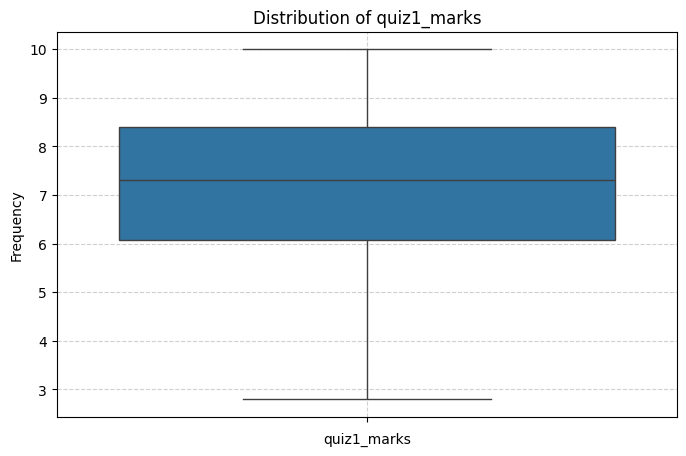

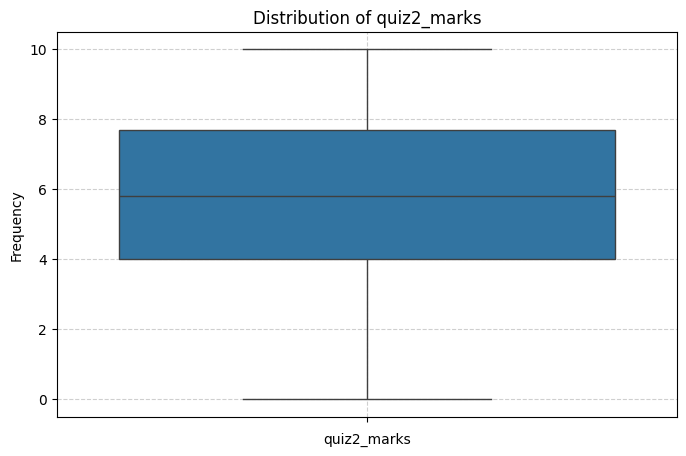

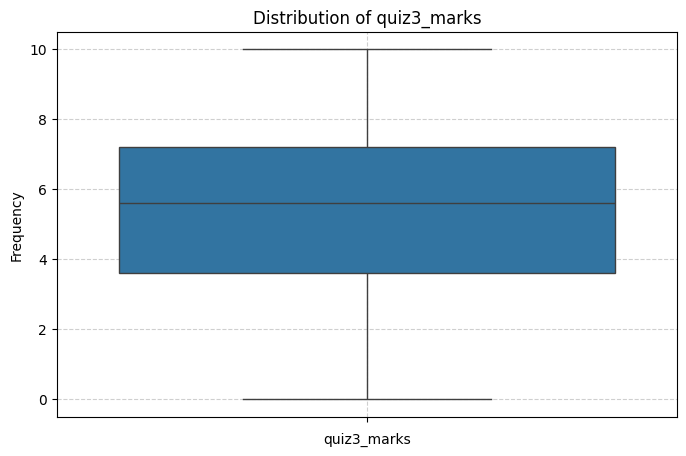

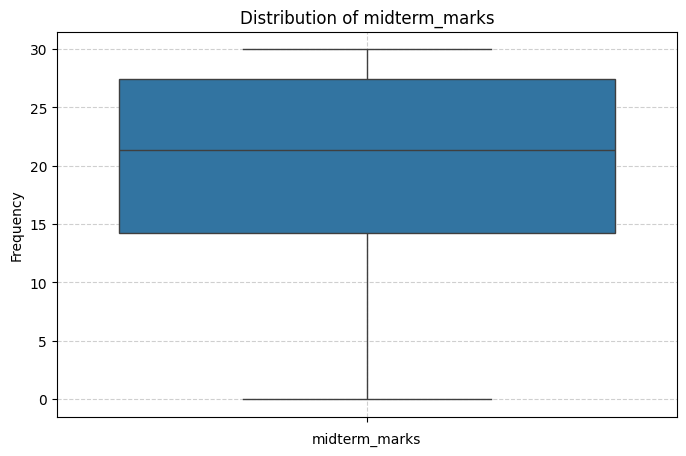

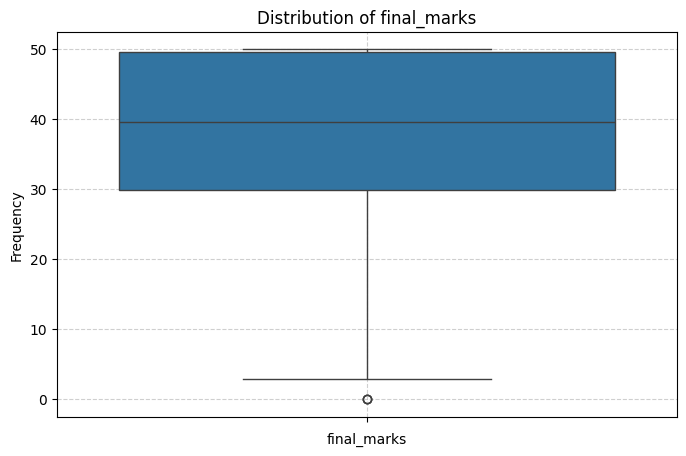

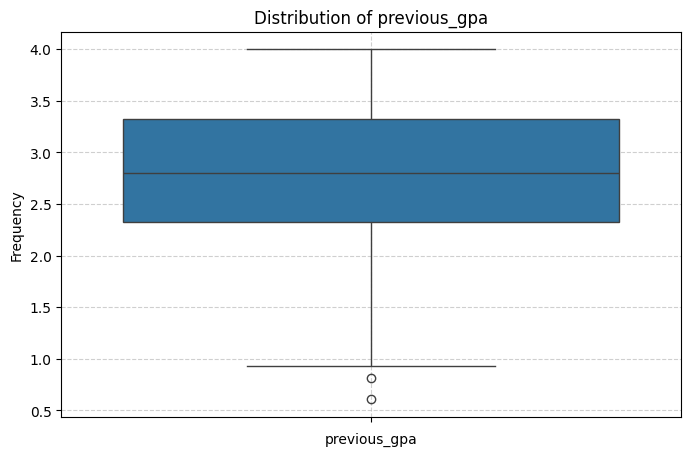

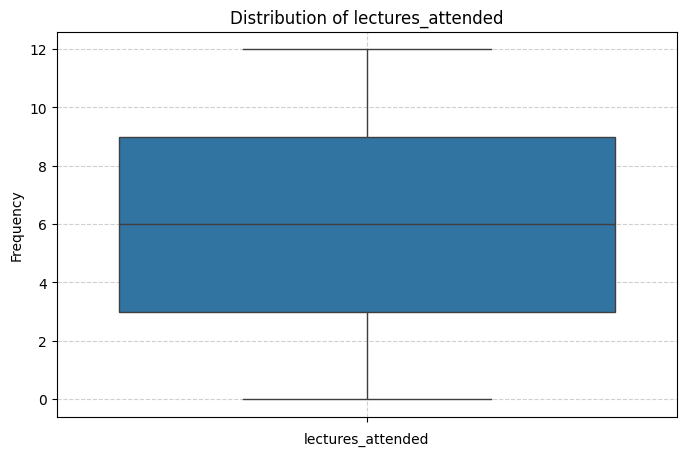

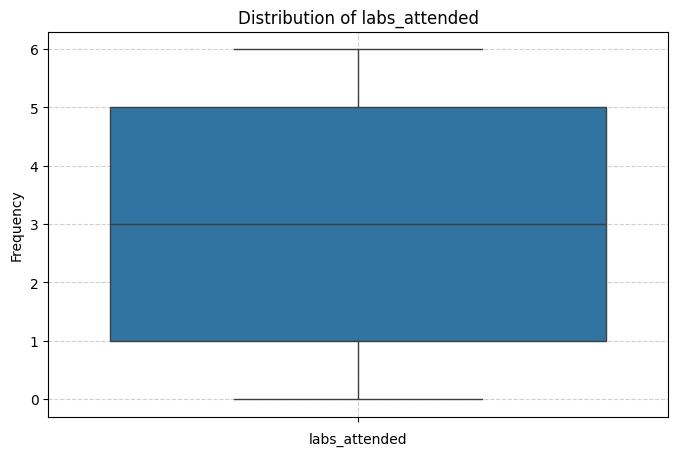

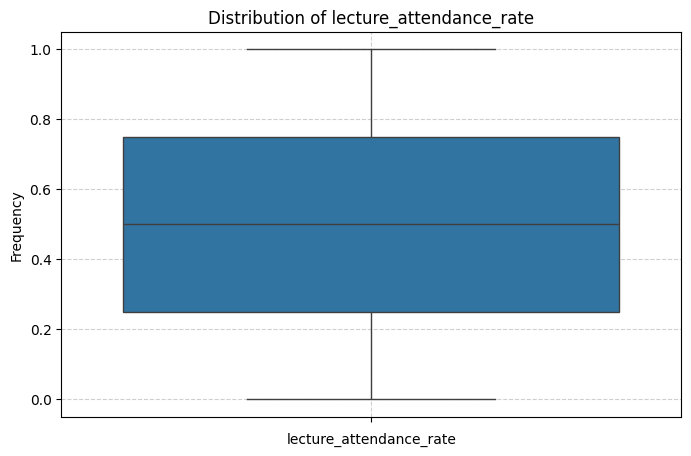

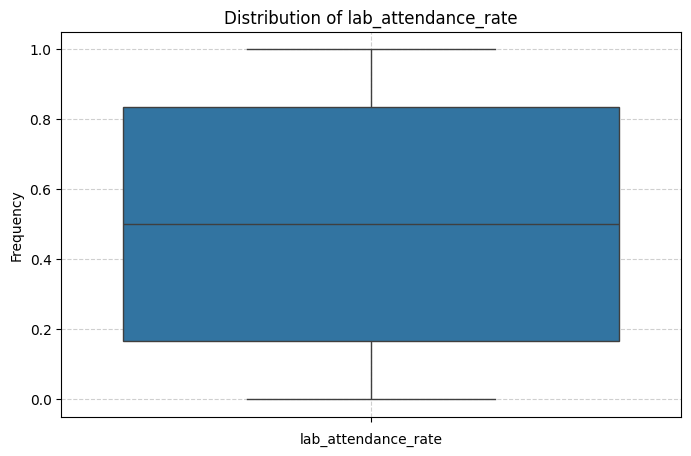

In [337]:
for col in numerical_cols:
    plt.figure(figsize=(8, 5))
    sns.boxplot(df_encoded[col])
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

# Data Transformation & PCA

In [338]:
scaler = StandardScaler()

df_transformed = df_encoded.copy()

# Apply StandardScaler to the identified numerical columns
df_transformed = scaler.fit_transform(df_transformed)

# Convert the numpy array back to a DataFrame with original column names for display
df_transformed = pd.DataFrame(df_transformed, columns=df_encoded.columns)

# Display the head of the transformed DataFrame to verify
print("DataFrame after standardizing numerical columns:")
df_transformed.head()

DataFrame after standardizing numerical columns:


,age,gender,quiz1_marks,quiz2_marks,quiz3_marks,midterm_marks,final_marks,previous_gpa,lectures_attended,labs_attended,lecture_attendance_rate,lab_attendance_rate
0,-1.139540,1.033908,0.463198,-0.069135,0.713452,1.214638,-0.074297,-0.322683,-0.541191,-1.065997,-0.541191,-1.065997
1,-0.245783,1.033908,1.706127,0.843441,-0.505808,0.657631,-0.371484,-0.555091,-1.347601,0.954850,-1.347601,0.954850
2,-1.139540,-0.967204,0.152466,-1.935767,-1.909804,-0.674341,-1.067750,0.251502,-1.616404,-1.571208,-1.616404,-1.571208
3,-0.245783,1.033908,-1.276902,-1.396518,1.637133,-0.274750,0.307801,-1.539408,0.802826,-1.571208,0.802826,-1.571208
4,-0.245783,-0.967204,-0.841877,0.179750,-1.281700,0.463890,-0.541305,-0.377367,0.265219,0.449638,0.265219,0.449638


# Principal Component Analysis

In [339]:
pca = PCA(n_components=12)
pca.fit_transform(df_transformed)

array([[ 2.70639798e-01, -1.66380967e+00, -6.16302054e-01, ...,
        -3.14670727e-01, -1.89004103e-16, -2.05694158e-16],
       [-2.50395134e+00, -4.24063704e-01, -9.34835034e-01, ...,
        -7.44283010e-01, -1.56146218e-16, -3.48655114e-18],
       [-1.80969682e-01, -3.27814794e+00, -1.01741000e+00, ...,
         6.68635300e-01,  6.57884471e-16, -1.28142142e-16],
       ...,
       [-1.26887274e+00,  1.74077982e+00,  6.26377545e-01, ...,
         6.73196366e-02, -2.25878675e-16,  2.99837355e-17],
       [-2.43156173e+00,  4.88462809e-01, -4.05885251e-01, ...,
        -8.85613278e-01, -3.83407026e-18, -1.92060869e-16],
       [-6.96709263e-01,  1.36310180e+00, -2.48124804e-01, ...,
         6.86254326e-01, -1.56146218e-16, -3.48655114e-18]])

In [341]:
prop_var = pca.explained_variance_ratio_
eigenvalues = pca.explained_variance_

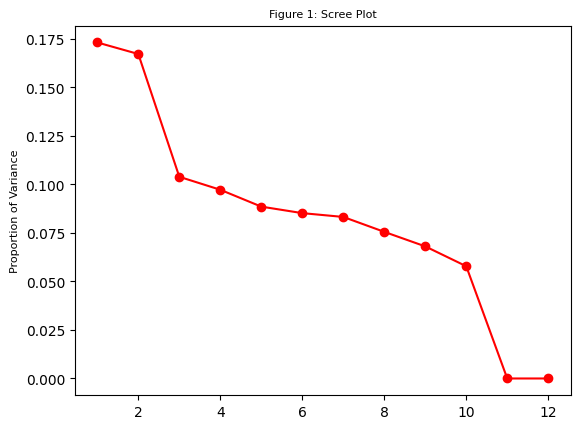

In [342]:
PC_numbers = np.arange(pca.n_components_) + 1

plt.plot(PC_numbers,
         prop_var,
         'ro-')
plt.title('Figure 1: Scree Plot', fontsize=8)
plt.ylabel('Proportion of Variance', fontsize=8)
plt.show()

In [343]:
pca_full = PCA().fit(df_transformed)
explained = pca_full.explained_variance_ratio_
cum_explained = np.cumsum(explained)

print("\nExplained variance per PC (percent) & cumulative:")
for i, (e, c) in enumerate(zip(explained*100, cum_explained*100), start=1):
    print(f"PC{i:02d}: {e:.2f}%  |  Cumulative: {c:.2f}%")


Explained variance per PC (percent) & cumulative:
PC01: 17.31%  |  Cumulative: 17.31%
PC02: 16.72%  |  Cumulative: 34.03%
PC03: 10.39%  |  Cumulative: 44.43%
PC04: 9.72%  |  Cumulative: 54.15%
PC05: 8.86%  |  Cumulative: 63.01%
PC06: 8.52%  |  Cumulative: 71.53%
PC07: 8.32%  |  Cumulative: 79.85%
PC08: 7.56%  |  Cumulative: 87.41%
PC09: 6.81%  |  Cumulative: 94.22%
PC10: 5.78%  |  Cumulative: 100.00%
PC11: 0.00%  |  Cumulative: 100.00%
PC12: 0.00%  |  Cumulative: 100.00%


The explained variance ratio measures how much of the total information (variance) each principal component (PC) captures from the dataset. The cumulative variance shows how much information is retained when multiple components are combined.

Based on the PCA results:

PC01 explains 17.31% of the total variance.

PC02 explains 16.72%, raising cumulative variance to 34.03%.

PC03 explains 10.39%, raising cumulative variance to 44.43%.

PC04 explains 9.72%, raising cumulative variance to 54.15%.

PC05 explains 8.86%, raising cumulative variance to 63.01%.

PC06 explains 8.52%, raising cumulative variance to 71.53%.

PC07 explains 8.32%, raising cumulative variance to 79.85%.

PC08 explains 7.56%, raising cumulative variance to 87.41%.

PC09 explains 6.81%, raising cumulative variance to 94.22%.

PC10 explains 5.78%, completing 100% of the total variance.

PC11–PC12 contribute 0%, indicating that they do not add additional unique information beyond what previous components have already captured.

These results show that the dataset does not rely on a single dominant dimension; instead, multiple components contribute moderate amounts of variance. This indicates a multidimensional structure where student performance, attendance, and GPA all shape the overall data space.

How Many Principal Components to Keep

A commonly recommended guideline in PCA is to retain enough principal components to explain at least 70–80% of the total variance. This ensures that most of the important information is preserved while reducing noise and redundancy.

The cumulative variance reaches 71.53% at PC06.

The cumulative variance reaches 79.85% at PC07.

Based on this:

The appropriate number of components to retain is 6 to 7 principal components.

PC06 meets the minimum recommended threshold (≥70%).

PC07 provides a more complete representation, capturing nearly 80% of total variance.

For dimensionality reduction tasks, retaining 7 components is a balanced and justified choice because it preserves a large proportion of the dataset’s information while still simplifying the feature space.

For visualization (such as the biplot), only the first two components (PC1 and PC2) are used, since they capture the strongest independent directions in the data and allow plotting in two dimensions.

In [344]:
pca = PCA(n_components=8)
PC = pca.fit_transform(df_transformed)

In [345]:
df_pca = pd.DataFrame(data = PC, columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8'])

df_pca.head(5)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,0.270640,-1.663810,-0.616302,-0.137391,-0.150724,0.537307,-0.037421,1.962982
1,-2.503951,-0.424064,-0.934835,-0.476129,0.115019,-1.386700,0.439732,1.000153
2,-0.180970,-3.278148,-1.017410,1.251639,-2.286587,0.034461,-0.363130,-1.385172
3,2.309667,-0.715948,-0.635166,-1.126939,0.541562,1.948302,-1.300632,0.838926
4,0.193027,0.767402,-0.411374,-0.054531,-1.123498,-0.071699,1.338291,-0.846504


In [347]:
def biplot(score,coef,labels=None, colors=None):

    xs = score[:,0]
    ys = score[:,1]
    n = coef.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())

    if colors is not None:
        unique_clusters = np.unique(colors)
        for cluster_label in unique_clusters:
            # Filter points belonging to the current cluster
            cluster_mask = (colors == cluster_label)
            plt.scatter(xs[cluster_mask] * scalex,
                        ys[cluster_mask] * scaley,
                        s=5,
                        label=f'Cluster {int(cluster_label)}')
        plt.legend()
    else:
        plt.scatter(xs * scalex,ys * scaley,
                    s=5,
                    color='orange') # Changed 'color' to 'c' and used 'colors' parameter

    for i in range(n):
        plt.arrow(0, 0, coef[i,0],
                  coef[i,1],color = 'purple',
                  alpha = 0.5)
        plt.text(coef[i,0]* 1.2, # Adjusted position
                 coef[i,1] * 1.2, # Adjusted position
                 labels[i],
                 color = 'darkblue',
                 ha = 'center',
                 va = 'center')
    # --------------------------------------
    # ADD DOTTED REFERENCE LINES (like example)
    # --------------------------------------
    plt.axhline(0, color='black', linestyle='dotted', linewidth=1)
    plt.axvline(0, color='black', linestyle='dotted', linewidth=1)

    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))


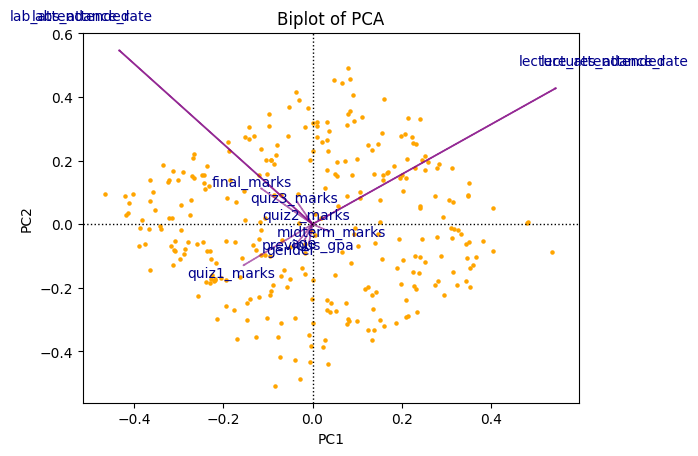

In [348]:
plt.title('Biplot of PCA')

biplot(PC,
       np.transpose(pca.components_),
       list(df_transformed.columns))

Interpretation of PC1, PC2, and Key Variable Contributions

Based on the PCA biplot, the first principal component (PC1) primarily represents overall academic performance. This is evident from the loading vectors of variables such as quiz scores, midterm marks, final exam marks, and previous GPA, all of which point strongly along the positive direction of PC1. These variables cluster together and extend horizontally, indicating that they contribute heavily to the variance captured by PC1. Students with higher PC1 scores tend to achieve stronger results across assessments, whereas students with lower PC1 scores show consistently weaker academic outcomes. Therefore, PC1 can be interpreted as the Academic Achievement Component, capturing differences in test performance and prior academic strength.

In contrast, the second principal component (PC2) reflects patterns related to attendance and course engagement. The loading vectors for lectures attended, labs attended, as well as the lecture and lab attendance rates, all point upward along the positive direction of PC2. The vertical alignment of these arrows shows that PC2 captures variance associated with how consistently students participate in class activities. Students with high PC2 values generally demonstrate strong engagement through frequent attendance, while those with low PC2 values exhibit poorer attendance behavior. As such, PC2 represents the Attendance and Engagement Component, distinguishing students based on their course participation rather than academic performance.

Together, PC1 and PC2 reveal two independent but meaningful dimensions in the student dataset. PC1 separates students by academic achievement, while PC2 distinguishes them by attendance patterns. The variables most influential to PC1 are the quiz marks, midterm marks, final marks, and previous GPA, whereas the variables most important for PC2 are the attendance-related measures. This pattern demonstrates that performance and engagement contribute separately to the overall structure of the data, a relationship clearly visualized through the positioning and direction of the loading vectors in the biplot.

#  K-MEANS CLUSTERING

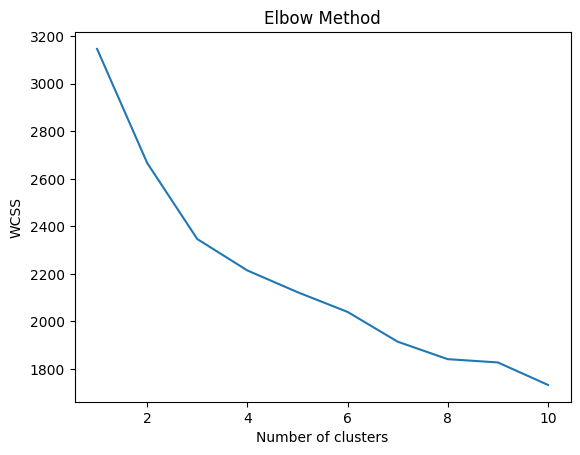

In [349]:
wcss = []
for i in range(1, 11):   #clusters 1-10
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df_pca)
    wcss.append(kmeans.inertia_)

# Plot the elbow method graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [350]:
# Create a DataFrame to display the WCSS values for each number of clusters
wcss_table = pd.DataFrame({
    "Number of Clusters": range(1, 11),
    "WCSS": wcss
})

# Display the table
print(wcss_table)

   Number of Clusters         WCSS
0                   1  3146.714258
1                   2  2666.713760
2                   3  2346.476103
3                   4  2214.302448
4                   5  2122.965681
5                   6  2039.771699
6                   7  1914.419773
7                   8  1840.931432
8                   9  1827.106117
9                  10  1732.504972


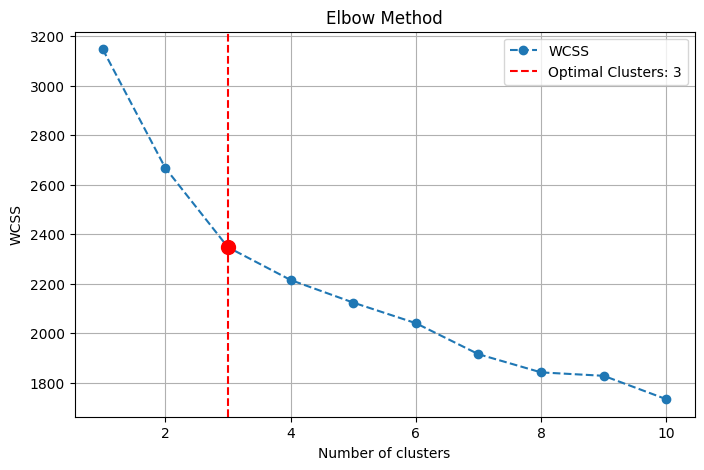

The optimal number of clusters is: 3


In [351]:
from kneed import KneeLocator

# Example WCSS values and cluster numbers
clusters = range(1, 11)

# Automatically find the elbow point using the KneeLocator
knee_locator = KneeLocator(clusters, wcss, curve="convex", direction="decreasing")
optimal_clusters = knee_locator.knee

# Plot the Elbow Method graph
plt.figure(figsize=(8, 5))
plt.plot(clusters, wcss, marker='o', linestyle='--', label="WCSS")
plt.axvline(optimal_clusters, linestyle='--', color='red', label=f'Optimal Clusters: {optimal_clusters}')
plt.scatter(optimal_clusters, wcss[optimal_clusters-1], c='red', s=100, zorder=5)  # Highlight elbow point
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.legend()
plt.grid(True)
plt.show()

# Print the optimal number of clusters
print(f"The optimal number of clusters is: {optimal_clusters}")


In [352]:
# Fit K-Means to the data with optimal cluster
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++',random_state=42)
kmeans_cluster = kmeans.fit_predict(df_pca)

# Add the cluster labels to the DataFrame
df['KMeans'] = kmeans_cluster
df_transformed['KMeans'] = kmeans_cluster

In [353]:
# Evaluation
ss = silhouette_score(df_pca, kmeans_cluster)
print(ss)

0.14233610695259397


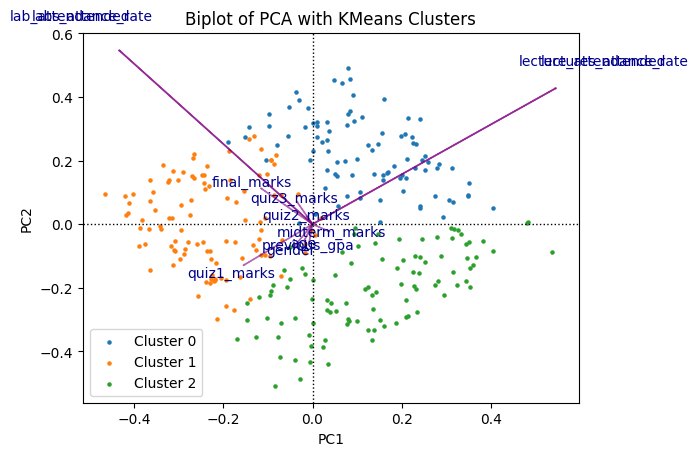

In [354]:
plt.title('Biplot of PCA with KMeans Clusters')
biplot(PC,
       np.transpose(pca.components_),
       list(df_transformed.columns),
       colors=df_transformed['KMeans'])
plt.show()

In [355]:
df.head()

,student_id,name,age,gender,quiz1_marks,quiz2_marks,quiz3_marks,total_assignments,midterm_marks,final_marks,previous_gpa,total_lectures,lectures_attended,total_lab_sessions,labs_attended,KMeans
0,1,Kristina Vaughan,19,Male,8.0,5.7,7.4,5,30.0,36.5,2.57,12,4,6,1,2
1,2,Rodney Daniels,21,Male,10.0,7.9,4.1,5,25.4,33.0,2.40,12,1,6,5,1
2,3,Jose Nash,19,Female,7.5,1.2,0.3,5,14.4,24.8,2.99,12,0,6,0,2
3,4,Nicole Martin,21,Male,5.2,2.5,9.9,5,17.7,41.0,1.68,12,9,6,0,2
4,5,Shelby Smith,21,Female,5.9,6.3,2.0,5,23.8,31.0,2.53,12,7,6,4,0


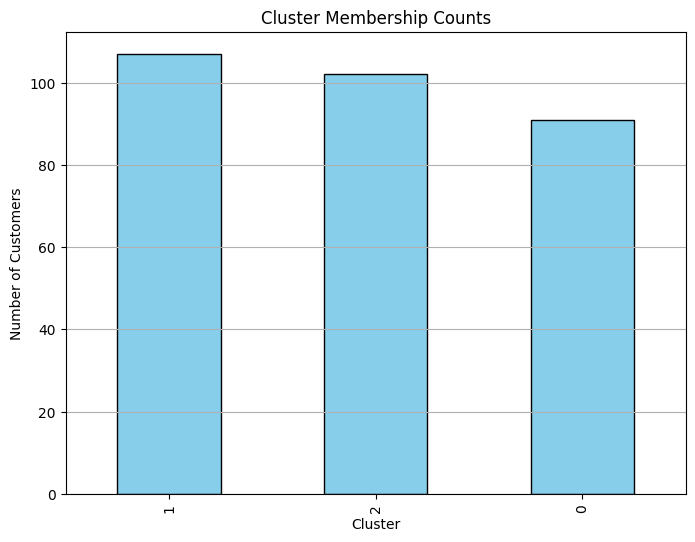

In [356]:
cluster_counts = df['KMeans'].value_counts()

plt.figure(figsize=(8, 6))
cluster_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Cluster Membership Counts')
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.grid(axis='y')
plt.show()

# Cluster Profiling & Educational Recommendations

## Cluster Profiling

After applying KMeans on the selected principal components, the resulting clusters show clear differences in academic performance, attendance patterns, and prior achievement. Each cluster represents a distinct group of students with similar academic behavior.

Cluster 0 — High Achievers

Students in this cluster generally show:

High previous GPA

Strong performance across quizzes, midterm, and final exam

High lecture and lab attendance rates

Consistent engagement with coursework

These students demonstrate strong academic ability and stable study habits. This cluster represents the top-performing group who are academically reliable and highly engaged.

Cluster 1 — Moderate Performers

This cluster exhibits:

Moderate GPA values

Average quiz and midterm scores

Reasonable attendance levels (neither high nor low)

Final marks that fall in the middle range

Students in this group are performing adequately, but their results suggest room for improvement. They may benefit from targeted support to strengthen specific skills or improve consistency.

Cluster 2 — At-Risk / Low Performers

Students in this group typically show:

Low attendance in lectures and labs

Lower quiz, midterm, and final exam scores

Relatively weaker previous GPA

Inconsistent engagement with course content

This cluster represents the at-risk group, where low attendance appears strongly linked to poor academic outcomes. These students may require early intervention, mentoring, or additional academic support to improve performance.

Summary

Overall, the clusters reveal meaningful patterns:

Cluster 0 consists of high achievers with strong academic backgrounds and excellent attendance.

Cluster 1 consists of average students with moderate performance and attendance.

Cluster 2 consists of at-risk students with low attendance and consistently weaker performance.

These insights can help instructors design targeted interventions, such as additional support for Cluster 2 and enrichment opportunities for Cluster 0.

## Interpretation via PCA biplot

The PCA biplot visualizes the students in terms of the first two principal components (PC1 and PC2), while also showing the loading vectors of the original variables. When the KMeans cluster labels are overlaid on the biplot, clear groupings emerge that help explain how student performance and attendance relate to each other across the principal component space.

Relationship Between Clusters and Principal Components

PC1 represents a direction strongly influenced by overall academic performance variables such as quiz marks, midterm marks, final exam marks, and previous GPA.
A higher score along PC1 indicates stronger academic achievement, while lower PC1 values indicate weaker performance.

PC2 captures variation that relates more to attendance behavior, primarily driven by lectures attended, labs attended, and the respective attendance rates.
Students with high PC2 scores tend to have high attendance, while those with low scores exhibit poor engagement in lectures and labs.

Cluster Patterns Observed in the Biplot
Cluster 0 — High Achievers

This cluster appears on the right side of the plot, generally with high PC1 values.
Their position indicates:

High quiz, midterm, and final exam scores

Strong previous GPA

Moderate to high attendance

Their proximity to the performance-related loading vectors shows that academic strength is the primary factor defining this group.

Cluster 1 — Moderate Performers

Cluster 1 is located near the center of the biplot, reflecting moderate values on both PC1 and PC2.
These students exhibit:

Average quiz and exam results

Reasonable attendance

No extreme academic strengths or weaknesses

Their central position indicates they are not strongly influenced by any specific set of variables; rather, they display balanced but unremarkable academic behavior.

Cluster 2 — At-Risk / Low Performers

This cluster tends to fall on the lower left area of the biplot, where both PC1 and PC2 values are low.
This position reflects:

Lower overall academic performance

Weaker previous GPA

Poor lecture and lab attendance

Their alignment with the negative directions of performance and attendance loading vectors suggests that both low engagement and low achievement contribute to their separation from other groups.

Interpretation of Variable Loading Vectors

The loading vectors show which original variables most strongly influence the PCA directions:

Quiz marks, midterm marks, final marks, and GPA point toward the positive direction of PC1, confirming that PC1 primarily represents academic performance.

Lectures attended, labs attended, and attendance rates point upward along PC2, confirming that PC2 reflects attendance behavior.

The angles between vectors also indicate relationships:

Performance-related variables cluster together, showing strong correlations.

Attendance variables cluster together, reflecting consistent engagement patterns.

Academic and attendance vectors form moderate angles, indicating that while related, they describe somewhat different aspects of student behavior.

Overall Interpretation

The PCA biplot effectively separates students based on combined dimensions of performance and attendance.
Overlaying clusters reveals that:

High achievers concentrate where performance vectors dominate (high PC1).

At-risk students cluster in regions where both PC1 and PC2 are low.

Moderate students occupy the middle ground, where neither attendance nor performance strongly dominates.

## Actionable Recommendations

Based on the PCA findings and KMeans clustering results, clear patterns emerge regarding student performance, engagement, and attendance. The clusters reveal distinct groups of learners, ranging from high achievers to at-risk students. The following recommendations are designed to address the needs of each cluster and improve overall academic outcomes.

1. Implement Targeted Remedial and Support Programs for At-Risk Students (Cluster 2)

The PCA biplot places Cluster 2 in the region characterized by low values on both PC1 (academic performance) and PC2 (attendance variables). This indicates that these students struggle not only with quizzes and exams but also with lecture and lab participation.

Recommended actions:

Provide mandatory academic support sessions focused on foundational concepts.

Offer small-group tutoring or peer-assisted learning to reinforce coursework.

Monitor attendance closely and implement early intervention when students show patterns of absenteeism.

Coordinate with academic advisors to help these students develop effective study habits.

Justification:
Cluster 2’s position in the PCA space shows that low attendance and weak performance are closely linked. Improving engagement and strengthening basic skills can help prevent further academic decline.

2. Develop Advanced Learning Opportunities for High-Performing Students (Cluster 0)

Cluster 0 appears in the high-PC1 region of the PCA biplot, indicating strong academic performance and solid engagement levels. These students demonstrate consistent achievement across quizzes, midterms, and final exams.

Recommended actions:

Create honors-level projects, research opportunities, or advanced electives.

Introduce mentorship programs where high achievers assist their peers.

Encourage participation in competitions, academic conferences, or leadership programs.

Justification:
Students in this cluster benefit from academic challenges that maintain motivation and support long-term development. Leveraging their strengths also indirectly supports other clusters through peer influence.

3. Strengthen Attendance and Engagement Policies for the Mid-Performing Group (Cluster 1)

Cluster 1 occupies the central region of the PCA biplot, with moderate values for both academic performance and attendance. These students often perform adequately but may not be fully leveraging available learning opportunities.

Recommended actions:

Implement engagement-focused initiatives, such as active learning sessions or interactive labs.

Provide optional study groups and structured review sessions before major assessments.

Use automated attendance reminders or participation incentives to improve engagement.

Justification:
Cluster 1 students have the potential to move toward Cluster 0 with improved study consistency and class participation. These interventions can help raise overall academic standards.

4. Enhance Course-Level Monitoring Through Data Dashboards (Cross-Cluster Strategy)

Given the clear structure shown by PCA and clustering, the university can benefit from routine monitoring of key indicators such as attendance, quiz performance, and midterm progress.

Recommended actions:

Build dashboards that track student trajectories in real time.

Allow instructors to identify students moving toward at-risk patterns early.

Use automated alerts when attendance or performance drops below thresholds.

Justification:
The PCA results show strong correlations between academic performance and engagement. Real-time tracking allows early intervention before issues escalate.

5. Introduce Attendance-Based Academic Policies (Cross-Cluster Strategy)

Attendance variables strongly influence PC2, and clusters with high attendance consistently outperform those with low participation.

Recommended actions:

Incorporate attendance into course grading schemes.

Provide flexible learning support for students facing schedule barriers.

Offer in-class participation activities that incentivize attendance.

Justification:
Since PC2 shows attendance as a major explanatory dimension in the data, improving attendance can directly enhance student success.